<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
stn_code                       291665 non-null object
sampling_date                  435739 non-null object
state                          435742 non-null object
location                       435739 non-null object
agency                         286261 non-null object
type                           430349 non-null object
so2                            401096 non-null float64
no2                            419509 non-null float64
rspm                           395520 non-null float64
spm                            198355 non-null float64
location_monitoring_station    408251 non-null object
pm2_5                          9314 non-null float64
date                           435735 non-null object
dtypes: float64(5), object(8)
memory usage: 43.2+ MB
(348593, 4) (87149, 4) (348593,) (87149,)
RMSE TestData =  29.71758940506008
R-squared (R2) Score: 0.9258879934982615


RMSE TestData =  2.9121676507873615
RSquared value on test: 0.999288304594501
R-squared (R2) Score: 0.999288304594501


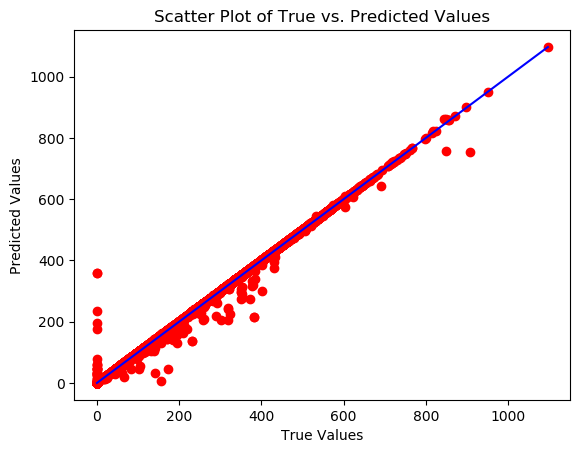

            Actual   Predicted
17593   183.333333  183.333333
134413  336.153846  336.153846
360229  134.263638  134.263637
358484  134.263638  134.263637
265920  134.263638  134.263637
...            ...         ...
69766   315.384615  315.384615
391744  377.748718  377.716923
10306   206.666667  206.666667
275551  203.333333  203.333333
372655  325.384615  325.384615

[87149 rows x 2 columns]
Enter the value of SOI:23
Enter the value of NOI:78
Enter the value of RPI:245
Enter the value of SPM:345
Predicted Value: 344.99166666749994
AIR Quality is predicated as --> Very unhealthy


In [2]:
## Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score
# Reading the dataset
df=pd.read_csv('data.csv',encoding='unicode_escape')
# ## Data Understanding
df.head()
# Loading the dataset
df.shape
# As we can see that there are 4,35,742 rows and 13 columns in the dataset
df.info()
# Checking the over all information on the dataset.
df.isnull().sum()
# There are a lot of missing values present in the dataset
df.describe()
# Checking the descriptive stats of the numeric values present in the data like mean, standard deviation, min values and max value present in the data
df.state.unique()
df.state.count()
df.nunique()
# These are all the unique values present in the dataframe
# ### Checking all null values and treating those null values.
df.isnull().sum()
nullvalues = df.isnull().sum().sort_values(ascending=False)
# Checking all null values
nullvalues
# higher null values present in pm2_5 followed by spm
df.isnull().count()
null_values_percentage = (df.isnull().sum()/df.isnull().count()*100)#.sort_values(ascending=False)
#count(returns Non-NAN value)
null_values_percentage
null_values_percentage.sort_values(ascending=False)
missing_data_with_percentage = pd.concat([nullvalues, null_values_percentage], axis=1, keys=['Total', 'Percent'])
# Concatenating total null values and their percentage of missing values for further imputation or column deletion
missing_data_with_percentage
# As you can see below these are the percentages of null values present in the dataset
df.drop(['agency'],axis=1,inplace=True)
df.drop(['stn_code'],axis=1,inplace=True)
df.drop(['date'],axis=1,inplace=True)
df.drop(['sampling_date'],axis=1,inplace=True)
df.drop(['location_monitoring_station'],axis=1,inplace=True)
# Dropping unnecessary columns
df.isnull().sum()
# Now checking the null values
df
df['location']=df['location'].fillna(df['location'].mode()[0])
df['type']=df['type'].fillna(df['type'].mode()[0])
# Null value Imputation for categorical data
df['so2']=df['so2'].fillna(df['so2'].mean())
df['no2']=df['no2'].fillna(df['no2'].mean())
df['rspm']=df['rspm'].fillna(df['rspm'].std())
df['spm']=df['spm'].fillna(df['spm'].std())
# null values are replaced with zeros for the numerical data

df.isnull().sum()
# Now we have successfully imputed null values which were present in the dataset
df
# The following features are important for our machine learning models.
# # CALCULATE AIR QUALITY INDEX FOR SO2 BASED ON FORMULA
# The air quality index is a piecewise linear function of the pollutant concentration. At the boundary between AQI categories, there is a discontinuous jump of one AQI unit. To convert from concentration to AQI this equation is used.

# ### Function to calculate so2 individual pollutant index(si)
def cal_SOi(so2):
    si=0
    if (so2<=40):
     si= so2*(50/40)
    elif (so2>40 and so2<=80):
     si= 50+(so2-40)*(50/40)
    elif (so2>80 and so2<=380):
     si= 100+(so2-80)*(100/300)
    elif (so2>380 and so2<=800):
     si= 200+(so2-380)*(100/420)
    elif (so2>800 and so2<=1600):
     si= 300+(so2-800)*(100/800)
    elif (so2>1600):
     si= 400+(so2-1600)*(100/800)
    return si
df['SOi']=df['so2'].apply(cal_SOi)
data= df[['so2','SOi']]
data.head()
# calculating the individual pollutant index for so2(sulphur dioxide)

# ### Function to calculate no2 individual pollutant index(ni)
def cal_Noi(no2):
    ni=0
    if(no2<=40):
     ni= no2*50/40
    elif(no2>40 and no2<=80):
     ni= 50+(no2-40)*(50/40)
    elif(no2>80 and no2<=180):
     ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
     ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
     ni= 300+(no2-280)*(100/120)
    else:
     ni= 400+(no2-400)*(100/120)
    return ni
df['Noi']=df['no2'].apply(cal_Noi)
data= df[['no2','Noi']]
data.head()
# calculating the individual pollutant index for no2(nitrogen dioxide)

# ### Function to calculate rspm individual pollutant index(rpi)
def cal_RSPMI(rspm):
    rpi=0
    if(rspm<=30):
     rpi=rspm*50/30
    elif(rspm>30 and rspm<=60):
     rpi=50+(rspm-30)*50/30
    elif(rspm>60 and rspm<=90):
     rpi=100+(rspm-60)*100/30
    elif(rspm>90 and rspm<=120):
     rpi=200+(rspm-90)*100/30
    elif(rspm>120 and rspm<=250):
     rpi=300+(rspm-120)*(100/130)
    else:
     rpi=400+(rspm-250)*(100/130)
    return rpi
df['Rpi']=df['rspm'].apply(cal_RSPMI)
data= df[['rspm','Rpi']]
data.head()
# calculating the individual pollutant index for rspm(respirable suspended particualte matter concentration)


# ### Function to calculate spm individual pollutant index(spi)
def cal_SPMi(spm):
    spi=0
    if(spm<=50):
     spi=spm*50/50
    elif(spm>50 and spm<=100):
     spi=50+(spm-50)*(50/50)
    elif(spm>100 and spm<=250):
     spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
     spi=200+(spm-250)*(100/100)
    elif(spm>350 and spm<=430):
     spi=300+(spm-350)*(100/80)
    else:
     spi=400+(spm-430)*(100/430)
    return spi
   
df['SPMi']=df['spm'].apply(cal_SPMi)
data= df[['spm','SPMi']]
data.head()
# calculating the individual pollutant index for spm(suspended particulate matter)


# ### function to calculate the air quality index (AQI) of every data value
def cal_aqi(si,ni,rspmi,spmi):
    aqi=0
    if(si>ni and si>rspmi and si>spmi):
     aqi=si
    if(ni>si and ni>rspmi and ni>spmi):
     aqi=ni
    if(rspmi>si and rspmi>ni and rspmi>spmi):
     aqi=rspmi
    if(spmi>si and spmi>ni and spmi>rspmi):
     aqi=spmi
    return aqi

df['AQI']=df.apply(lambda x:cal_aqi(x['SOi'],x['Noi'],x['Rpi'],x['SPMi']),axis=1)
data= df[['state','SOi','Noi','Rpi','SPMi','AQI']]
data.head()
# Caluclating the Air Quality Index.

def AQI_Range(x):
    if x<=50:
        return "Good"
    elif x>50 and x<=100:
        return "Moderate"
    elif x>100 and x<=200:
        return "Poor"
    elif x>200 and x<=300:
        return "Unhealthy"
    elif x>300 and x<=400:
        return "Very unhealthy"
    elif x>400:
        return "Hazardous"

df['AQI_Range'] = df['AQI'] .apply(AQI_Range)
df.head()
# Using threshold values to classify a particular values as good, moderate, poor, unhealthy, very unhealthy and Hazardous

df['AQI_Range'].value_counts()
# These are the counts of values present in the AQI_Range column.

# ### Splitting the dataset into Dependent and Independent columns
X=df[['SOi','Noi','Rpi','SPMi']]
Y=df['AQI']
X.head()
# we only select columns like soi, noi, rpi, spmi

Y.head()
# the AQI column is the target column
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=70)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)
# splitting the data into training and testing data
X_train
Y_train

# ### Linear Regression
model=LinearRegression()
model.fit(X_train,Y_train)

#predicting on test
test_pred=model.predict(X_test)
test_pred

RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_pred)))
print("RMSE TestData = ",str(RMSE_test))

# Calculate R-squared (R2) Score
r2 = r2_score(Y_test, test_pred)
print("R-squared (R2) Score:", r2)

# Create a scatter plot of the true target values (Y_test) against the predicted target values (Y_pred)
plt.scatter(Y_test,test_pred , color='red')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='blue')  # Diagonal line for comparison
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression of Scatter Plot of True vs. Predicted Values')
plt.show()

# ### Random Forest Regressor
RF=RandomForestRegressor().fit(X_train,Y_train)

#predicting on test
test_preds1=RF.predict(X_test)

RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds1)))
print("RMSE TestData = ",str(RMSE_test))
print('RSquared value on test:',RF.score(X_test, Y_test))

from sklearn.metrics import r2_score

# Calculate R-squared (R2) Score
r2 = r2_score(Y_test, test_preds1)
print("R-squared (R2) Score:", r2)

# Create a scatter plot of the true target values (Y_test) against the predicted target values (Y_pred)
plt.scatter(Y_test,test_preds1 , color='red')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='blue')  # Diagonal line for comparison
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of True vs. Predicted Values')
plt.show()

# Create a DataFrame with the actual and predicted values
df = pd.DataFrame({'Actual': Y_test, 'Predicted': test_preds1})

# Print the DataFrame
print(df)

#SOi	Noi	RpiSPM

SOi = float(input("Enter the value of SOI:"))
NOi = float(input("Enter the value of NOI:"))
RPi = float(input("Enter the value of RPI:"))
SPM = float(input("Enter the value of SPM:"))
# Create a numpy array with the input values
input_data = np.array([[SOi, NOi, RPi, SPM]])

# Make predictions using the trained model
predicted_value = RF.predict(input_data)

# Print the predicted value
print("Predicted Value:", predicted_value[0])
if predicted_value<=50:
    print("AIR Quality is predicated as --> Good")
elif predicted_value>50 and predicted_value<=100:
    print ("AIR Quality is predicated as --> Moderate")
elif predicted_value>100 and predicted_value<=200:
     print ("AIR Quality is predicated as --> Poor")
elif predicted_value>200 and predicted_value<=300:
     print ("AIR Quality is predicated as --> Unhealthy")
elif predicted_value>300 and predicted_value<=400:
     print ("AIR Quality is predicated as --> Very unhealthy")
elif predicted_value>400:
     print ("AIR Quality is predicated as --> Hazardous")
